# Bio End Semester project
 ### Team 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Dna_seq=pd.read_excel(r"C:\Users\ss261\Downloads\DNA-seq.xlsx")

In [3]:
Dna_Label=pd.read_excel(r"C:\Users\ss261\Downloads\DNA-Label.xlsx")

In [4]:
protein_seq=pd.concat([Dna_seq,Dna_Label],axis=1)

In [5]:
protein_seq.head()

,sequence,Label
0,CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...,0
1,GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...,0
2,GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...,0
3,GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...,1
4,GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...,1


# Data Visualization

Text(0.5, 1.0, 'Class distribution of DNA binding proteins')

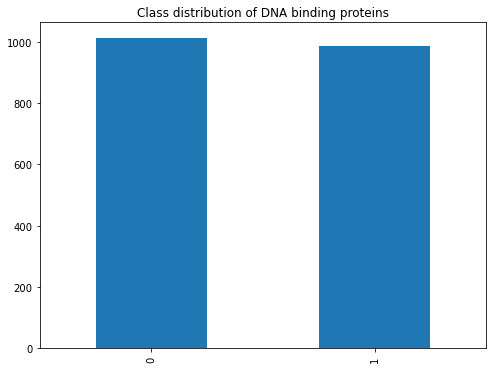

In [6]:
plt.figure(figsize=(8,6))
protein_seq['Label'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of DNA binding proteins")

# Data preprocessing

In [7]:
sequence = list(protein_seq['sequence'])
encoded_list = []

In [8]:
def encode_seq(s):
    Encode = {'A':[1,0,0,0],'T':[0,1,0,0],'C':[0,0,1,0],'G':[0,0,0,1]}
    return [Encode[x] for x in s]

for i in sequence:
    x = encode_seq(i)
    encoded_list.append(x)

X = np.array(encoded_list)
X.shape

(2000, 50, 4)

In [9]:
y = protein_seq['Label']
y

0       0
1       0
2       0
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    1
Name: Label, Length: 2000, dtype: int64

In [10]:
import pandas as pd
import numpy as np
import os
import tensorflow
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, MaxPooling2D, Conv2D, LSTM, GRU, Bidirectional
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [11]:
X_train, X_test, y_train, y_test_y = train_test_split(X, y,test_size=0.2,random_state=42)

In [12]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test_y)

# Training Models
## Convolutional Neural Network(CNN)

In [13]:
cnn= Sequential()
cnn.add(Conv1D(filters = 27, kernel_size = (4), activation = 'relu', input_shape = (50,4)))
cnn.add(MaxPooling1D(pool_size= (3)))
cnn.add(Flatten())
cnn.add(Dense(128, activation = 'relu'))
cnn.add(Dense(64, activation = 'relu'))
cnn.add(Dense(2, activation = 'sigmoid'))
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(X_train, y_train, batch_size = 128, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
13/13 [==============================] - 0s 33ms/step - loss: 0.6922 - accuracy: 0.5219 - val_loss: 0.6774 - val_accuracy: 0.5875
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.6981 - val_loss: 0.6224 - val_accuracy: 0.7275
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.5614 - accuracy: 0.7956 - val_loss: 0.5374 - val_accuracy: 0.7225
Epoch 4/10
13/13 [==============================] - 0s 13ms/step - loss: 0.4359 - accuracy: 0.8250 - val_loss: 0.4248 - val_accuracy: 0.8250
Epoch 5/10
13/13 [==============================] - 0s 13ms/step - loss: 0.3564 - accuracy: 0.8494 - val_loss: 0.3655 - val_accuracy: 0.8400
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: 0.2786 - accuracy: 0.8894 - val_loss: 0.3138 - val_accuracy: 0.8650
Epoch 7/10
13/13 [==============================] - 0s 13ms/step - loss: 0.2323 - accuracy: 0.9119 - val_loss: 0.2614 - val_accuracy: 0.8825
Epoch 8/10
13/13

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 47, 27)            459       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 27)            0         
_________________________________________________________________
flatten (Flatten)            (None, 405)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               51968     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 130       
Total params: 60,813
Trainable params: 60,813
Non-trainable params: 0
____________________________________________________

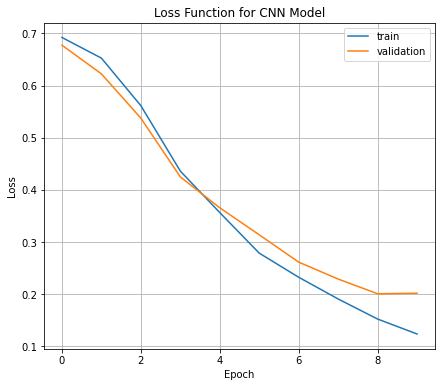

In [15]:
plt.figure(figsize=(7,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Function for CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

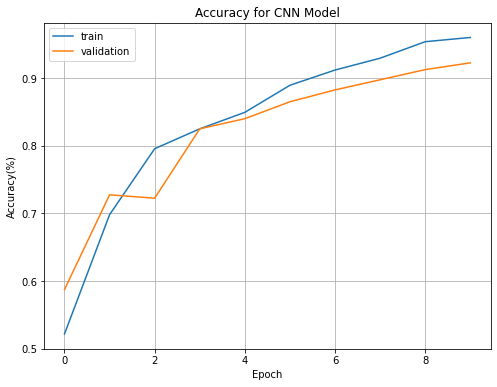

In [16]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.grid(True)
plt.title('Accuracy for CNN Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy(%)')
plt.legend()

In [17]:
yhat_probs  = cnn.predict(X_test)
yhat_classes =cnn.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test_y, yhat_classes)
precision = precision_score(y_test_y, yhat_classes)
recall = recall_score(y_test_y, yhat_classes)
f1 = f1_score(y_test_y, yhat_classes)

In [19]:
print(' Classification Metrics for CNN:')
print('-------------------------------------------')
print('Accuracy  :',accuracy)
print('Precision :',precision)
print('Recall    :',recall)
print('f1        :',f1)
print('-------------------------------------------')

 Classification Metrics for CNN:
-------------------------------------------
Accuracy  : 0.9225
Precision : 0.8727272727272727
Recall    : 0.9846153846153847
f1        : 0.9253012048192771
-------------------------------------------


# CNN + LSTM

In [20]:
lstm = Sequential()
lstm.add(Conv1D(filters = 27, kernel_size = (4), activation = 'relu', input_shape = (50,4)))
lstm.add(MaxPooling1D(pool_size= (3)))
lstm.add(Conv1D(filters = 14, kernel_size = (2), activation = 'relu', padding = 'same'))
lstm.add(MaxPooling1D(pool_size= (2)))
lstm.add(LSTM(128, activation = 'relu'))
lstm.add(Dense(64, activation = 'relu'))
lstm.add(Dense(16, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
lstm.add(Dense(2, activation = 'sigmoid'))
lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = lstm.fit(X_train, y_train, batch_size = 128, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 52ms/step - loss: 0.9278 - accuracy: 0.5050 - val_loss: 0.9044 - val_accuracy: 0.5125
Epoch 2/10
13/13 [==============================] - 0s 21ms/step - loss: 0.8840 - accuracy: 0.5069 - val_loss: 0.8502 - val_accuracy: 0.5475
Epoch 3/10
13/13 [==============================] - 0s 25ms/step - loss: 0.8010 - accuracy: 0.6475 - val_loss: 0.7479 - val_accuracy: 0.6675
Epoch 4/10
13/13 [==============================] - 0s 24ms/step - loss: 0.7080 - accuracy: 0.7631 - val_loss: 0.6352 - val_accuracy: 0.8175
Epoch 5/10
13/13 [==============================] - 0s 24ms/step - loss: 0.5996 - accuracy: 0.8131 - val_loss: 0.5961 - val_accuracy: 0.7800
Epoch 6/10
13/13 [==============================] - 0s 24ms/step - loss: 0.5370 - accuracy: 0.8188 - val_loss: 0.5851 - val_accuracy: 0.7525
Epoch 7/10
13/13 [==============================] - 0s 21ms/step - loss: 0.4692 - accuracy: 0.8419 - val_loss: 0.4902 - val_accuracy: 0.8175
Epoch 8/10
13

In [21]:
lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 47, 27)            459       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 27)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 14)            770       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 14)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               73216     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 16)               

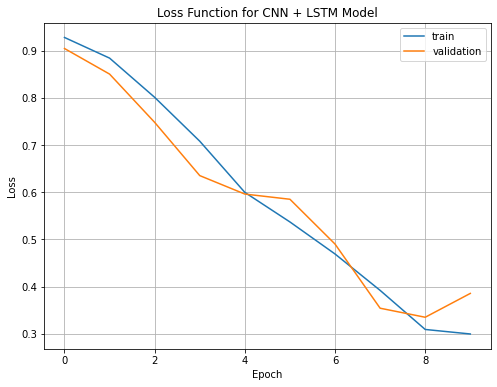

In [22]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Function for CNN + LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

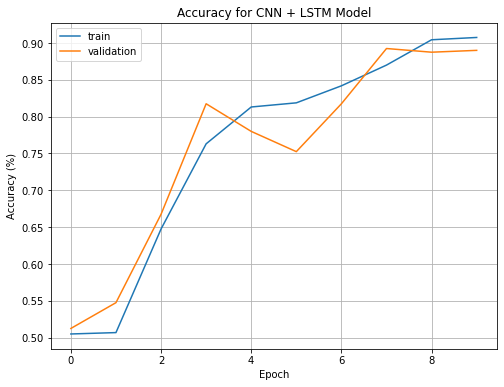

In [23]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.grid(True)
plt.title('Accuracy for CNN + LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

In [24]:
yhat_probs  = lstm.predict(X_test)
yhat_classes =lstm.predict_classes(X_test)

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test_y, yhat_classes)
precision = precision_score(y_test_y, yhat_classes)
recall = recall_score(y_test_y, yhat_classes)
f1 = f1_score(y_test_y, yhat_classes)

In [26]:
print('      Classification Metrics for CNN-LSTM:')
print('-------------------------------------------')
print('Accuracy  :',accuracy)
print('Precision :',precision)
print('Recall    :',recall)
print('f1        :',f1)
print('-------------------------------------------')

      Classification Metrics for CNN-LSTM:
-------------------------------------------
Accuracy  : 0.89
Precision : 0.8212765957446808
Recall    : 0.9897435897435898
f1        : 0.8976744186046511
-------------------------------------------


# CNN + Bidirectional LSTM

In [27]:
Bi_lstm=Sequential()
Bi_lstm.add(Conv1D(filters = 27, kernel_size = (4), activation = 'relu', input_shape = (50, 4)))
Bi_lstm.add(MaxPooling1D(pool_size= (3)))
Bi_lstm.add(Conv1D(filters = 14, kernel_size = (2), activation = 'relu', padding = 'same'))
Bi_lstm.add(MaxPooling1D(pool_size= (2)))
Bi_lstm.add(Bidirectional(LSTM(128, activation = 'relu')))
Bi_lstm.add(Dense(128, activation = 'relu'))
Bi_lstm.add(Dense(64, activation = 'relu'))
Bi_lstm.add(Dense(16, activation = 'relu',kernel_regularizer = regularizers.l2(0.01)))
Bi_lstm.add(Dense(2, activation = 'sigmoid'))
Bi_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = Bi_lstm.fit(X_train, y_train, batch_size =128, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 69ms/step - loss: 0.9313 - accuracy: 0.5469 - val_loss: 0.9073 - val_accuracy: 0.6300
Epoch 2/10
13/13 [==============================] - 0s 25ms/step - loss: 0.8844 - accuracy: 0.6331 - val_loss: 0.8471 - val_accuracy: 0.5825
Epoch 3/10
13/13 [==============================] - 0s 25ms/step - loss: 0.7662 - accuracy: 0.7469 - val_loss: 0.6948 - val_accuracy: 0.7350
Epoch 4/10
13/13 [==============================] - 0s 25ms/step - loss: 0.5971 - accuracy: 0.8138 - val_loss: 0.5123 - val_accuracy: 0.8425
Epoch 5/10
13/13 [==============================] - 0s 25ms/step - loss: 0.4852 - accuracy: 0.8531 - val_loss: 0.4439 - val_accuracy: 0.8500
Epoch 6/10
13/13 [==============================] - 0s 25ms/step - loss: 0.3758 - accuracy: 0.9031 - val_loss: 0.3439 - val_accuracy: 0.9100
Epoch 7/10
13/13 [==============================] - 0s 25ms/step - loss: 0.2879 - accuracy: 0.9256 - val_loss: 0.2343 - val_accuracy: 0.9500
Epoch 8/10
13

In [28]:
Bi_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 47, 27)            459       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 15, 27)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 15, 14)            770       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 7, 14)             0         
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               146432    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

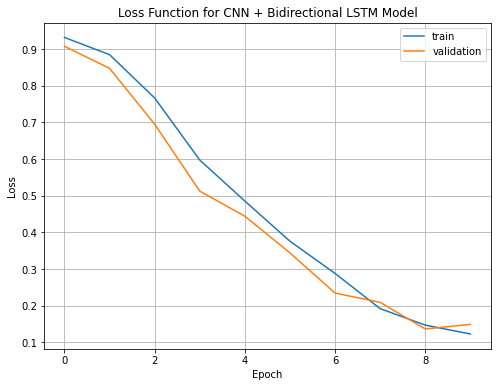

In [29]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Loss Function for CNN + Bidirectional LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

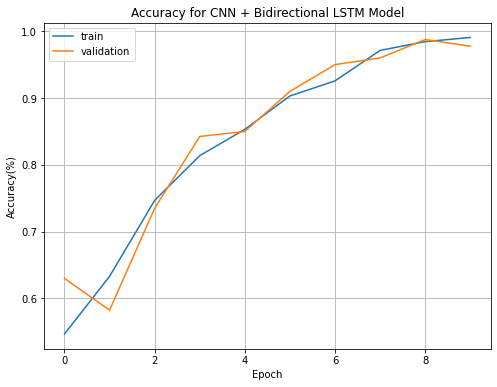

In [30]:
plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.grid(True)
plt.title('Accuracy for CNN + Bidirectional LSTM Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy(%)')
plt.legend()

In [31]:
yhat_probs  = Bi_lstm.predict(X_test)
yhat_classes =Bi_lstm.predict_classes(X_test)

In [32]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test_y, yhat_classes)
precision = precision_score(y_test_y, yhat_classes)
recall = recall_score(y_test_y, yhat_classes)
f1 = f1_score(y_test_y, yhat_classes)

In [33]:
print(' Classification Metrics for CNN-Bidirectional LSTM:')
print('-------------------------------------------')
print('Accuracy  :',accuracy)
print('Precision :',precision)
print('Recall    :',recall)
print('f1        :',f1)
print('-------------------------------------------')

 Classification Metrics for CNN-Bidirectional LSTM:
-------------------------------------------
Accuracy  : 0.9775
Precision : 0.9558823529411765
Recall    : 1.0
f1        : 0.9774436090225563
-------------------------------------------
